In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
train = pd.read_csv('/kaggle/input/complete-train-dataset/Train.csv')
train.head(10)

,Image_ID,Image_Caption,Intent_Taxonomy
0,Sports_1,চল্লিশের দোরগোড়ায় থাকা কোনো খেলোয়াড় দল থেকে বা...,Advocative
1,Sports_3,বিপিএলের চলতি আসরে প্রথমবার মাঠে নেমেছিলেন ইংল...,Advocative
2,Sports_11,একটা সময় পড়েছিলেন মৃত্যুঝুঁকিতে। বাঁচবেন কি না...,Advocative
3,Sports_17,৮১ রানের দুর্দান্ত ইনিংস খেলে ফিরলেন ওয়ার্নার,Advocative
4,Sports_18,২৫ বলে ওয়ার্নারের ঝড়ো ফিফটি,Advocative
5,Sports_36,খেলার দিন সকালে একান্ত অনুশীলনে সাকিব,Advocative
6,Sports_87,শুভ জন্মদিন মিচেল জনসন,Advocative
7,Sports_91,সৌম্য ৩২ বলে অর্ধশতক করে শেষ পর্যন্ত অপরাজিত ছ...,Advocative
8,Sports_92,"খেলেছেন ২৬ বল, তাতেই ৫ চার ও ৩ ছয়ে তুলেছেন ৫১ ...",Advocative
9,Sports_93,তাওহিদ হৃদয়ের সৌজন্যে এবারের বিপিএল পেয়েছে প্র...,Advocative


In [3]:
train[train['Image_ID'] == 'Sports_1']

,Image_ID,Image_Caption,Intent_Taxonomy
0,Sports_1,চল্লিশের দোরগোড়ায় থাকা কোনো খেলোয়াড় দল থেকে বা...,Advocative


In [4]:
train['Intent_Taxonomy'].value_counts()

Intent_Taxonomy
Expressive       518
Informative      514
Advocative       386
Exhibitionist    371
Controversial    319
Promotive        315
Name: count, dtype: int64

In [5]:
labels_dictionary = {'Expressive' : 0 , 'Informative' : 1 , 'Advocative' : 2 , 'Exhibitionist' : 3 , 'Controversial' : 4 , 'Promotive' : 5}

In [6]:
import cv2

train_image_path = '/kaggle/input/complete-train-dataset/Train/Train/'
img_data = []
image_formats = ['.jpg', '.JPG' , '.jpeg', '.png', '.gif', '.tiff', '.tif', '.bmp', '.webp', '.heif', '.heic', '.svg']

count = 0
for i in train['Image_ID']:
    for ext in image_formats:
        temp = cv2.imread(train_image_path + str(i) + ext)
        if temp is not None:
            img_data.append(temp)
            break

print(f"Total failed images: {count}")


Total failed images: 0


In [7]:
len(img_data)

2423

In [8]:
for i in range(len(img_data)):
    resized_image = cv2.resize(img_data[i], (224, 224))
    img_data[i] = resized_image

In [9]:
img_data = np.array(img_data)

In [10]:
img_data.shape

(2423, 224, 224, 3)

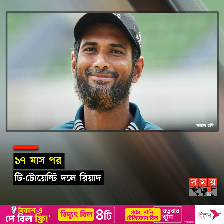

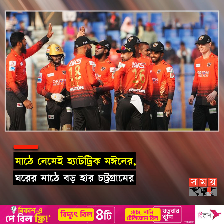

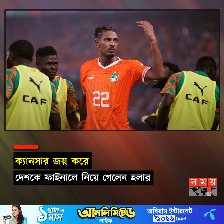

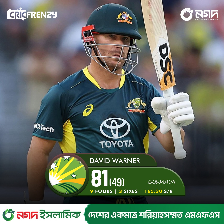

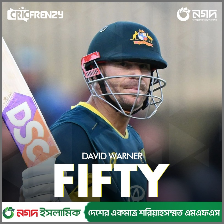

In [11]:
len(img_data)
for i in range(len(img_data)):
    cv2_imshow(img_data[i])
    if i >= 4:
        break